# <center><b>Practice 3.2</b>: Clustering Customers</center>

---

### 1. Import thư viện

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

---

### 2. Load dataset, Data Understanding

In [18]:
df = pd.read_csv("../data/Mall_Customers.csv")

print("Thông tin dataset:")
print(df.info())

print("Mô tả thống kê:")
print(df.describe())

Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Mô tả thống kê:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.75000

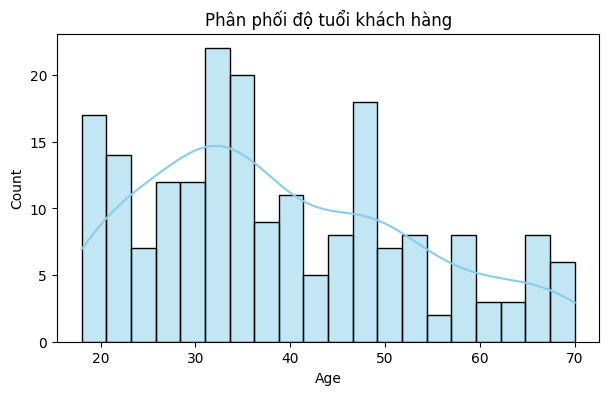

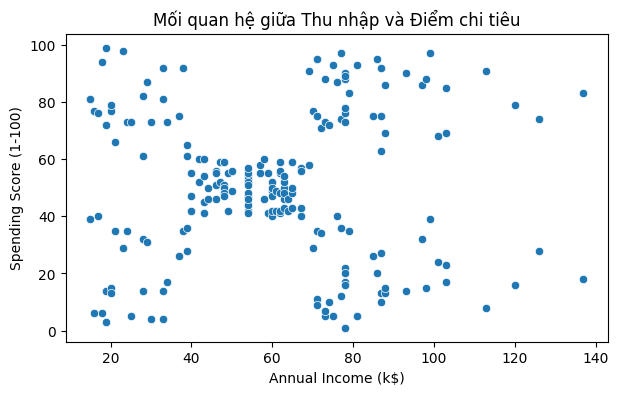

In [19]:
#Phân tích dữ liệu ban đầu
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Phân phối độ tuổi khách hàng")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Mối quan hệ giữa Thu nhập và Điểm chi tiêu")
plt.show()

---

### 3. Select Features

Text(0, 0.5, 'Spending Score (1-100)')

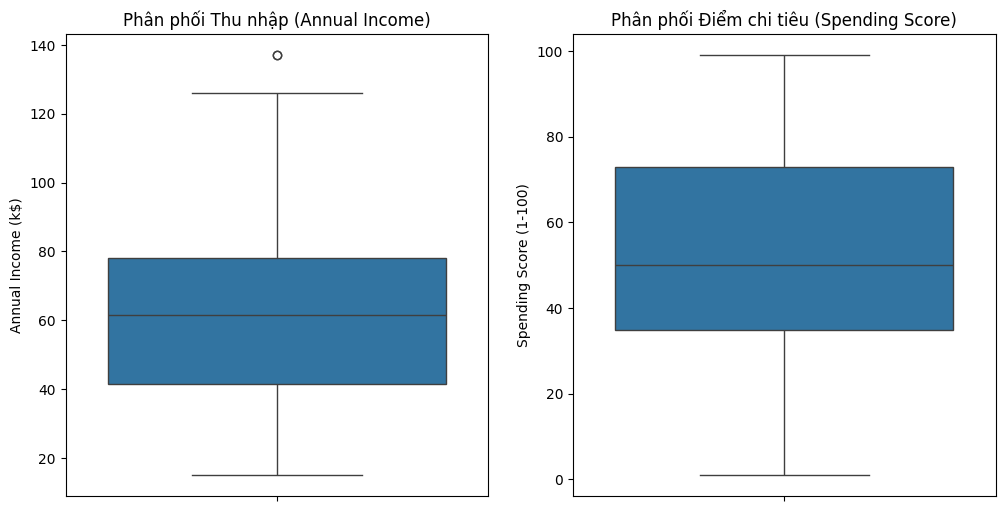

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 1. Vẽ Boxplot annual_income
sns.boxplot(y=df['Annual Income (k$)'], ax=ax[0])
ax[0].set_title('Phân phối Thu nhập (Annual Income)')
ax[0].set_ylabel('Annual Income (k$)')

# 2. Vẽ Boxplot spending_score
sns.boxplot(y=df['Spending Score (1-100)'], ax=ax[1])
ax[1].set_title('Phân phối Điểm chi tiêu (Spending Score)')
ax[1].set_ylabel('Spending Score (1-100)')

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

---

---

## Model K-mean

In [22]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        
        self.centroids = None
       	self.labels_ = None
        self.inertia_ = None

    def _init_centroids(self, X):
        """Khởi tạo centroids bằng cách chọn ngẫu nhiên k điểm."""
        np.random.seed(self.random_state)
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[idx]

    def _compute_distances(self, X, centroids):
        """Tính khoảng cách Euclidean từ từng điểm đến từng centroid."""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - centroids[k], axis=1)
        return distances

    def _compute_inertia(self, X, labels):
        """Tính tổng bình phương khoảng cách (inertia)."""
        inertia = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - self.centroids[k]) ** 2)
        return inertia

    def fit(self, X):
        """Huấn luyện mô hình K-Means."""
        X = np.array(X)
        self.centroids = self._init_centroids(X)

        for _ in range(self.max_iter):
            # Gán cụm
            distances = self._compute_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)

            # Tính centroid mới
            new_centroids = np.array([
                X[labels == k].mean(axis=0) if np.any(labels == k)
                else self.centroids[k]   # tránh empty cluster
                for k in range(self.n_clusters)
            ])

            # Kiểm tra hội tụ
            shift = np.linalg.norm(new_centroids - self.centroids)

            self.centroids = new_centroids
            self.labels_ = labels

            if shift < self.tol:
                break

        # Tính inertia
        self.inertia_ = self._compute_inertia(X, self.labels_)

    def predict(self, X):
        """Dự đoán cụm cho dữ liệu mới."""
        X = np.array(X)
        distances = self._compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        """Huấn luyện và trả về luôn nhãn cụm."""
        self.fit(X)
        return self.labels_


### 4. Scale Data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Inertia')

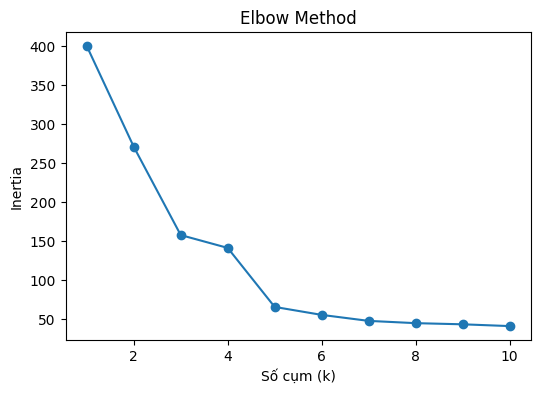

In [24]:
# Chọn số cụm k bằng Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeansScratch(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")

---

### 5. Áp dụng K-Means với k = 3-5

In [25]:
kmeans3 = KMeansScratch(n_clusters=3, random_state=42)
kmeans4 = KMeansScratch(n_clusters=4, random_state=42)
kmeans5 = KMeansScratch(n_clusters=5, random_state=42)

df["Cluster_3"] = kmeans3.fit_predict(X_scaled)
df["Cluster_4"] = kmeans4.fit_predict(X_scaled)
df["Cluster_5"] = kmeans5.fit_predict(X_scaled)

In [26]:
cluster_stats_k3 = df.groupby("Cluster_3")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(f"{cluster_stats_k3}\n")

cluster_stats_k4 = df.groupby("Cluster_4")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(f"{cluster_stats_k4}\n")

cluster_stats_k5 = df.groupby("Cluster_5")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_stats_k5)

           Annual Income (k$)  Spending Score (1-100)
Cluster_3                                            
0                   86.538462               82.128205
1                   44.154472               49.829268
2                   87.000000               18.631579

           Annual Income (k$)  Spending Score (1-100)
Cluster_4                                            
0                   67.943396               61.867925
1                   28.076923               76.230769
2                   30.645161               26.838710
3                   87.297297               18.054054

           Annual Income (k$)  Spending Score (1-100)
Cluster_5                                            
0                   55.087500               49.712500
1                   25.727273               79.363636
2                   26.304348               20.913043
3                   86.538462               82.128205
4                   87.750000               17.583333


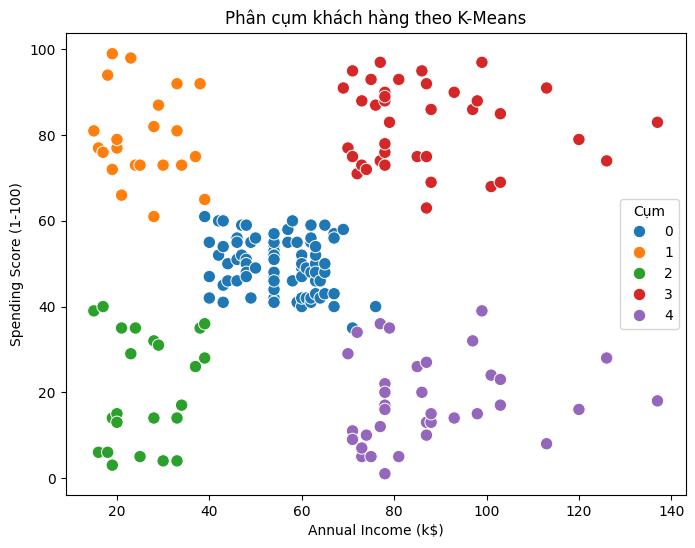

In [27]:
# Trực quan hoá các cụm
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_5',
    palette='tab10',
    data=df,
    s=80
)
plt.title('Phân cụm khách hàng theo K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cụm')
plt.show()

NHẬN XÉT:

- Cụm 0: Thu nhập trung bình, chi tiêu trung bình → Nhóm khách hàng ổn định.
- Cụm 1: Thu nhập thấp, chi tiêu cao → Nhóm rủi ro. Có khả năng chi tiêu vượt ngưỡng so với thu nhập, thường bị tác động mạnh bởi khuyến mãi.
- Cụm 2: Thu nhập thấp, chi tiêu thấp → Nhóm tiết kiệm, nhạy cảm giá. Doanh thu thấp nhưng dễ mở rộng nếu có gói sản phẩm chi phí thấp.
- Cụm 3: Thu nhập cao, chi tiêu cao → Nhóm sinh lợi tốt nhưng dễ xoay chuyển giữa các thương hiệu. Cần chiến lược giữ chân.
- Cụm 4: Thu nhập cao, chi tiêu thấp → Khách hàng tiềm năng, biên độ tăng trưởng doanh thu lớn nếu tiếp cận đúng.


---

###  6. Đánh giá mô hình

=== Silhouette Scores ===
k = 2: 0.2933
k = 3: 0.4666
k = 4: 0.4082
k = 5: 0.5539
k = 6: 0.5369
k = 7: 0.4533
k = 8: 0.4380
k = 9: 0.4251
k = 10: 0.4059

=== Davies-Bouldin Scores (thấp hơn là tốt hơn) ===
k = 2: 1.2713
k = 3: 0.7165
k = 4: 0.8156
k = 5: 0.5708
k = 6: 0.6589
k = 7: 0.7129
k = 8: 0.7053
k = 9: 0.7246
k = 10: 0.7334


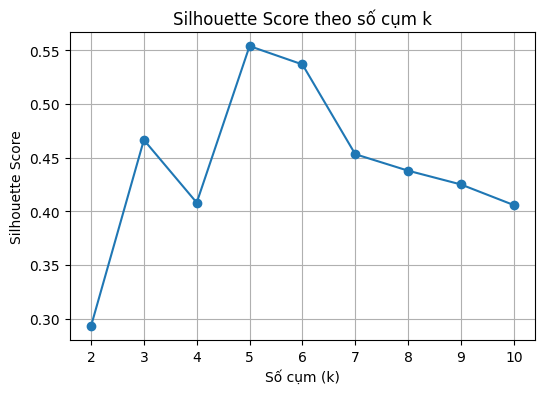

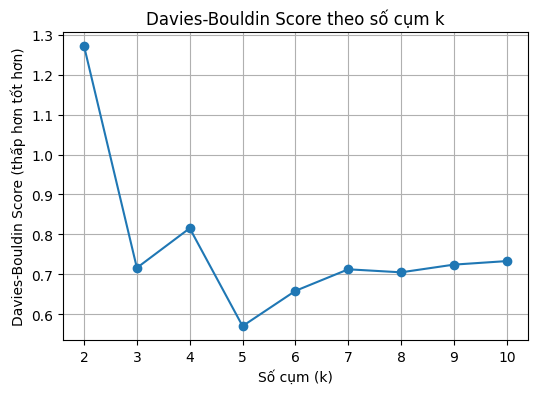

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

sil_scores = {}
db_scores = {}

# Đánh giá K từ 2 → 10
for k in range(2, 11):
    model = KMeansScratch(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)

    sil_scores[k] = sil
    db_scores[k] = db

# In kết quả
print("=== Silhouette Scores ===")
for k, sil in sil_scores.items():
    print(f"k = {k}: {sil:.4f}")

print("\n=== Davies-Bouldin Scores (thấp hơn là tốt hơn) ===")
for k, db in db_scores.items():
    print(f"k = {k}: {db:.4f}")

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(6, 4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title("Silhouette Score theo số cụm k")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Vẽ biểu đồ Davies-Bouldin
plt.figure(figsize=(6, 4))
plt.plot(list(db_scores.keys()), list(db_scores.values()), marker='o')
plt.title("Davies-Bouldin Score theo số cụm k")
plt.xlabel("Số cụm (k)")
plt.ylabel("Davies-Bouldin Score (thấp hơn tốt hơn)")
plt.grid(True)
plt.show()

---